In [44]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


In [3]:
# Load the data

myopia_file = "./Resources/myopia.csv"

myopia_df = pd.read_csv(myopia_file)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [13]:
# Prepare the data

# First looking at the data types
myopia_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [14]:
# Then check for any null values

for column in myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [17]:
# And any duplicate entries

print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [26]:
column_names = myopia_df.drop(columns="MYOPIC").columns

14


In [27]:
# Scale the data, then create an updated and cleaned dataframe

scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df.drop(columns="MYOPIC"))

column_names = myopia_df.drop(columns="MYOPIC").columns
new_myopic_df = pd.DataFrame(scaled_data, columns=column_names)
new_myopic_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [28]:
# Then save this updated dataframe as a new csv file
file_path = "./Resources/myopia_cleaned.csv"
new_myopic_df.to_csv(file_path, index=False)

# new_myopic_df = pd.read_csv(file_path)

In [33]:
# Apply Dimensionality Reduction
pca = PCA(n_components=0.90)

myopia_pca = pca.fit_transform(new_myopic_df)


pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [42]:
print(f"PCA has reduced the number of components from {len(new_myopic_df.columns)} to {len(myopia_pca[0])}")

total_variance = 0
for variance in pca.explained_variance_ratio_:
    total_variance += variance
print(f"For a total explained variance of {round(total_variance, 2) * 100}%")

PCA has reduced the number of components from 14 to 10
For a total explained variance of 92.0%


/home/matthew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


tsne_features.shape is (618, 2)


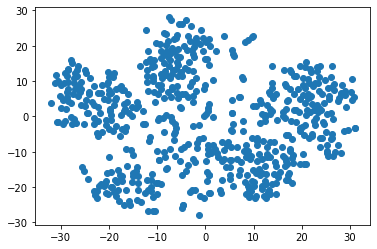

In [55]:
# Further reduce the dataset dimensions with t-SNE

tsne = TSNE(learning_rate=1000)
tsne_features = tsne.fit_transform(myopia_pca)
print(f"tsne_features.shape is {tsne_features.shape}")
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

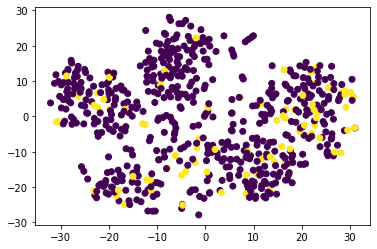

In [56]:
labels = myopia_df["MYOPIC"]
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [57]:
# Perform  cluster analysis with K-menas
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,276818.906250
1,2,143804.812500
2,3,90340.140625
3,4,65196.667969
4,5,42677.558594


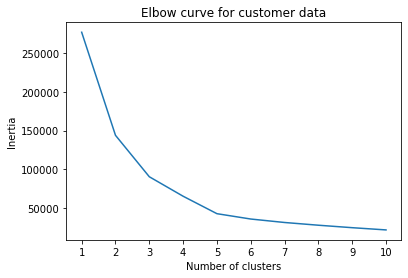

In [58]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()